Two-orbital Hubbard model
=========================

You will generalize the previous study to a two-orbital problem.
We will still focus on a Bethe lattice so that the DMFT self-consistency is simple. For the interaction
Hamiltonian, we will consider the Hubbard-Kanamori model for two bands. The Hamiltonian consists of density-density, spin-flip and pair-hopping terms:

$$
  H_{HK} =          U \sum_{i} n_{i \uparrow} n_{i \downarrow}
             + (U-2J) \sum_{i \neq i'} n_{i \uparrow} n_{i' \downarrow}
             + (U-3J) \sum_{i < i', \sigma} n_{i \sigma} n_{i' \sigma} 
             - J \sum_{i \neq i'} a^\dagger_{i \uparrow} a_{i \downarrow} a^\dagger_{i' \downarrow} a_{i' \uparrow}
             + J \sum_{i \neq i'} a^\dagger_{i \uparrow} a^\dagger_{i \downarrow} a_{i' \downarrow} a_{i' \uparrow},
$$

For this problem, the DMFT self-consistency still reads

$$
{\cal G}_{0 i \sigma}^{-1} (i\omega_n) = i\omega_n + \mu - t^2 G_{i \sigma} (i\omega_n)
$$

Note that the Green's functions are diagonal in spin and orbital indices.



<i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 1
----------

Modify the script for the single-band Hubbard model to work here. We will be interested in the half- and quarter-filled cases, for which the respective chemical potentials are:

$\mu_{\rm half} = 0.5 U + 0.5 (U-2J) + 0.5 (U-3J)$

$\mu_{\rm quarter} = -0.81 + (0.6899 - 1.1099 \, J/U) U + (-0.02548 + 0.02709 \, J/U -0.1606 \, (J/U)^2) U^2$

In [1]:
# TO BE MODIFIED: Find below the previous script scripts/one_band.py

from triqs.gf import *
from triqs.operators import *
from h5 import *
from triqs_cthyb import Solver
import numpy as np

import os
if not os.path.exists('data/one_band'):
    os.makedirs('data/one_band')

# Parameters of the model
t = 1.0
beta = 10.0
n_loops = 10

# Construct the impurity solver
S = Solver(beta = beta, gf_struct = [('up',1), ('down',1)] )

# I run for several values of U
for U in np.arange(1.0, 13.0):
    print('U =', U)

    # This is a first guess for G
    S.G_iw << SemiCircular(2*t)

    # DMFT loop with self-consistency
    for i in range(n_loops):
    
        print("\n\nIteration = %i / %i" % (i+1, n_loops))
    
        # Symmetrize the Green's function and use self-consistency
        g = 0.5 * ( S.G_iw['up'] + S.G_iw['down'] )
        for name, g0 in S.G0_iw:
            g0 << inverse( iOmega_n + U/2.0 - t**2 * g )

        # Solve the impurity problem
        S.solve(h_int = U * n('up',0) * n('down',0),   # Local Hamiltonian 
            n_cycles  = 10000,                           # Number of QMC cycles
            n_warmup_cycles = 5000,                      # Warmup cycles
            )
    
        # Save iteration in archive
        with HDFArchive("data/one_band/half-U%.2f.h5"%U) as A:
            A['G-%i'%i] = S.G_iw
            A['Sigma-%i'%i] = S.Sigma_iw

U = 1.0


Iteration = 1 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
17:36:18  41% ETA 00:00:00 cycle 2083 of 5000
17:36:18 100% ETA 00:00:00 cycle 4999 of 5000



Accumulating ...
17:36:18  20% ETA 00:00:00 cycle 2046 of 10000
17:36:19 100% ETA 00:00:00 cycle 9999 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure               | seconds   
Auto-correlation time | 0.00121841
Average order         | 0.000180423
Average sign          | 0.000183033
G_tau measure         | 0.0022792 
Total measure time    | 0.00386106
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.13419

Starting serial run at: 2023-08-28 17:36:18.568460


ert Delta_down_down: 0.0276912
Move set Remove four operators: 0.0240728
  Move  Remove Delta_up_up: 0.027297
  Move  Remove Delta_up_down: 0.0201105
  Move  Remove Delta_down_up: 0.0206622
  Move  Remove Delta_down_down: 0.0282551
Move  Shift one operator: 0.83864
[Rank 0] Warmup lasted: 0.240672 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.491363 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1
Average order: 8.1807
Auto-correlation time: 3.07816


Iteration = 2 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space


Iteration = 3 / 10
Found 4 subspaces.

Warming up ...
17:36:19  41% ETA 00:00:00 cycle 2096 of 5000
17:36:19 100% ETA 00:00:00 cycle 4999 of 500

If you are stuck or short on time, take a sneak peek at the solution below. 
Note that there is a variable `filling` that can be set either to `half` or to 
`quarter` and that defines the filling of the problem. 

**Warning**: don't run the script, the calculations are quite long! It is just here for illustration purposes.

In [2]:
%load scripts/two_band.py

For the following exercises, the calculations have already been performed for you, and the data is stored in the `data/two_bands` folder, see below. Use this data to perform the analysis below. Again, **do not run the script** on your machine! 

In [3]:
!ls data/two_band/

half-U1.00-J0.00.h5   half-U6.00-J0.00.h5      quarter-U2.00-J0.00.h5
half-U1.00-J0.10.h5   half-U6.00-J0.60.h5      quarter-U2.00-J0.20.h5
half-U1.00-J0.20.h5   half-U6.00-J1.20.h5      quarter-U2.00-J0.40.h5
half-U10.00-J0.00.h5  half-U7.00-J0.00.h5      quarter-U3.00-J0.00.h5
half-U10.00-J1.00.h5  half-U7.00-J0.70.h5      quarter-U3.00-J0.30.h5
half-U10.00-J2.00.h5  half-U7.00-J1.40.h5      quarter-U3.00-J0.60.h5
half-U11.00-J0.00.h5  half-U8.00-J0.00.h5      quarter-U4.00-J0.00.h5
half-U11.00-J1.10.h5  half-U8.00-J0.80.h5      quarter-U4.00-J0.40.h5
half-U11.00-J2.20.h5  half-U8.00-J1.60.h5      quarter-U4.00-J0.80.h5
half-U12.00-J0.00.h5  half-U9.00-J0.00.h5      quarter-U5.00-J0.00.h5
half-U12.00-J1.20.h5  half-U9.00-J0.90.h5      quarter-U5.00-J0.50.h5
half-U12.00-J2.40.h5  half-U9.00-J1.80.h5      quarter-U5.00-J1.00.h5
half-U2.00-J0.00.h5   quarter-U1.00-J0.00.h5   quarter-U6.00-J0.00.h5
half-U2.00-J0.20.h5   quarter-U1.00-J0.10.h5   quarter-U6.00-J0.60.h5
half-U2.00-J0.40.h5 

Solution 1
------------

Run the cell below to load the script that solves the two-orbital Hubbard model for a variety of filling, $U$ and $J$.

**Warning**: don't run the script, the calculations are quite long! It is just here for illustration purposes.

In [4]:
%load scripts/two_band.py

<i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 2
----------

Start by studying the problem at half-filling. By varying $U$ find the critical $U_c$ for the Mott transition for different values of $J$. How does $U_c$ change with $J$? Hint: take the following values for $J/U = 0.0, 0.1, 0.2$ and values of $U/t$ between 1 and 12. Use the data in the `data/two_band` directory that was generated for you using the `scripts/two_band.py` script.

Solution 2
------------

The Green's functions and self-energies are saved in archives in the `data/two_band` subdirectory. Here is a plot of the Green's functions for different values of $U$ at given $J$'s.

### J = 0.0

You will see that the Mott transition is somewhere between 6.0 and 7.0.

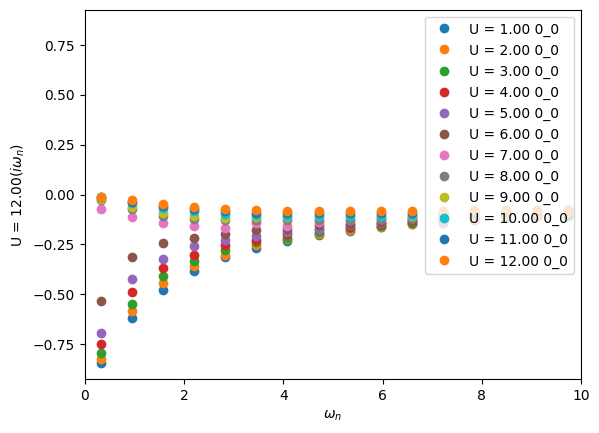

In [5]:
%matplotlib inline
import numpy as np
from triqs.gf import *
from h5 import *
from triqs.plot.mpl_interface import plt,oplot
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100 

coeff = 0.0
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### J = 0.1 U

You will see that the Mott transition is somewhere between 4.0 and 5.0.

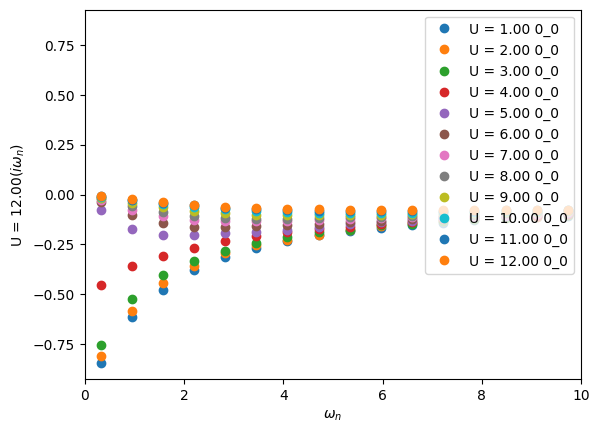

In [6]:
coeff = 0.1
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### J = 0.2 U

You will see that the Mott transition is somewhere between 3.0 and 4.0.

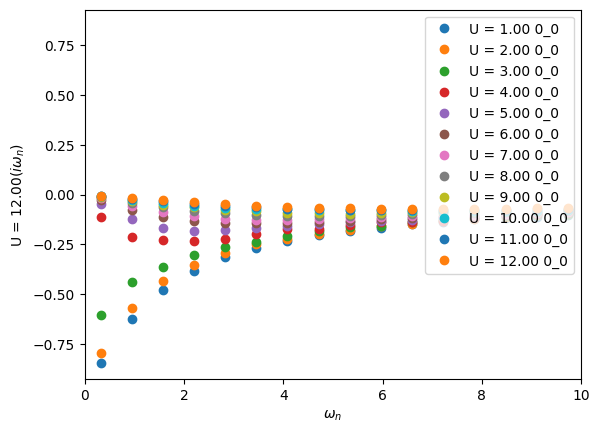

In [7]:
coeff = 0.2
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### Conclusion of Exercise 2

The value of $U_c$ is decreasing with increasing values of $J$! Can you understand why?

<i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 3
----------

Do the same study as in Exercise 2, but at quarter-filling. How does $U_c$ change with $J$? Take again values of $J/U = 0.0, 0.1, 0.2$ and values of $U/t$ between 1 and 12.

Solution of exercise 3
----------------------

The solution of the exercise is again the script called `run_two_bands.py` in the tutorial directory.
You will have to change `filling = 'quarter'`. The generated archives are in the `results` subdirectory. Here is a plot of
the Green's functions for different values of $U$ at given $J$'s.

### J = 0.0

You will se that the Mott transition is somewhere between 5.0 and 6.0.

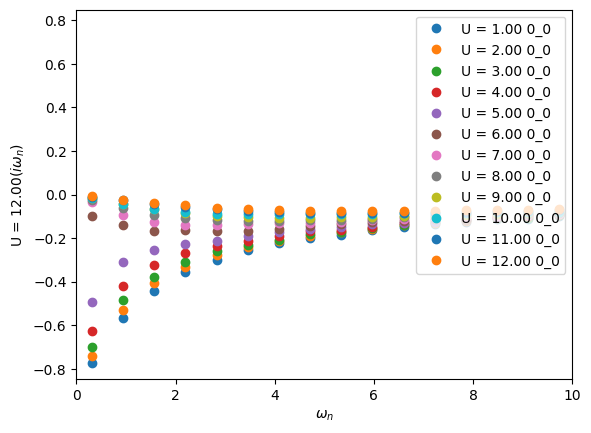

In [8]:
coeff = 0.0
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### J = 0.1 U

You will see that the Mott transition is somewhere between 7.0 and 8.0.

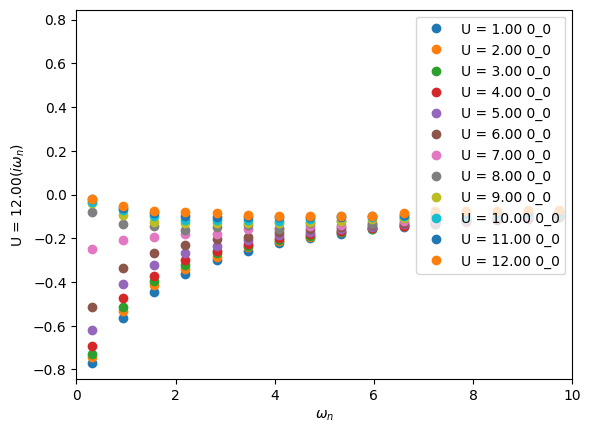

In [9]:
coeff = 0.1
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### J = 0.2 U

You will see that the Mott transition happens at values of $U$ larger than 12.

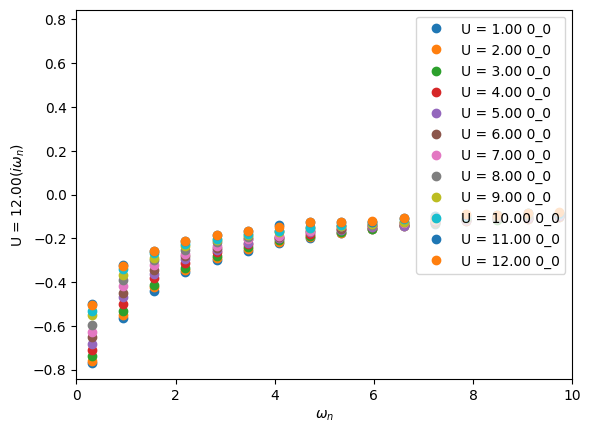

In [10]:
coeff = 0.2
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("data/two_band/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)
plt.show()

### Conclusion of Exercise 3

Now the value of $U_c$ is increasing with increasing values of $J$! Why? Numerically, this can also be investigated by looking at the impurity multiplets and their respective energies for different $U,J$ settings.